The onset and cessation of seasonal rainfall over Africa (Dunning et al., 2016;  https://doi.org/10.1002/2016JD025428)
--
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JD025428

<img align='right' width='600px' src='jgrd53341-fig-0002-m.jpg' />

Import Packages
--

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

Load Data
--

In [3]:
Data = xr.open_mfdataset('PERSIANN/PER*.nc').rename({'datetime':'time'})
Data = Data['precip'].where(Data['precip']!=-99)

Create Julian Day (Day of Year) Groupings
--

In [5]:
doy_Data = Data.mean(['lon','lat']).groupby('time.dayofyear')
doy_Data

DataArrayGroupBy, grouped over 'dayofyear'
366 groups with labels 1, 2, 3, 4, 5, ..., 363, 364, 365, 366.

Function for Anomaly Computation & Data Check for inf values
--

In [6]:
def stand(x, dim):
    return (x-x.mean(dim=dim))


def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

Visualization
--

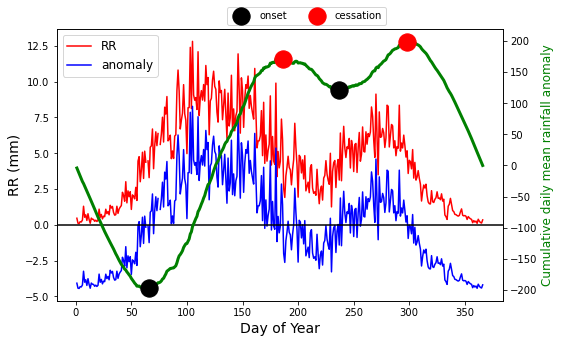

In [13]:
x = list(doy_Data.groups.copy())

fig, ax = plt.subplots(figsize=(8,5))

avg_Data = inf_check( doy_Data.mean() ,grid=True)
avg_Data.plot(ax = ax, color='r', label='RR')
stand(avg_Data, dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

#Legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('RR (mm)', fontsize=14)
ax.set_xlabel('Day of Year', fontsize=14)

ax.axhline(y=0, color='k')  #Horizontal Black Line at the Zero Mark



ax1 = ax.twinx()
anom = stand(avg_Data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly', fontsize=12, color='g')   #Set a Label



#Onset and Cessation Detection
anomaly = anom.values
dx = 28  #Detection Window  (We use a nearly monthly interval to avoid multiple mid-month false onsets)
onset=[]; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
        cessation.append([i+1,anomaly[i+1]])
        
        
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=0, ncol=2, bbox_to_anchor=(0.75, 1.1))


In [12]:
#Close NetCDF Data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Data.close()